# 課題
- 第1回レポート課題で設計したディジタルフィルタに白色雑音を入力し、各自に固有の弱定常過程y(n)と、そのFFT結果Y(ωn)を作成せよ。
- y(n)のスペクトルS(ωn)を推定せよ。推定方法は任意の1種類でよいが、データ長や次数等は、選んだ手法に適した値を選ぶこと。
- フィルタのh(n), H(ωn), 波形データのy(n), Y(ωn), 推定スペクトルS(ωn)、計5点のグラフと、
  各推定手法の原理と処理過程を文章および数式で説明したものをレポート(pdf 形式)にし、アップロードせよ。

## 前回のFIRフィルタ

(400, 1000)

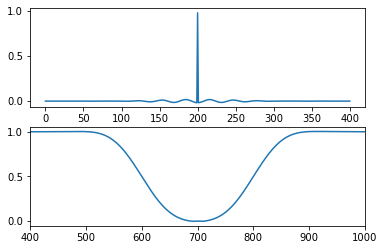

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

ntap = 400 + 1 # filter oder + 1

fs = 22050
n = 88200

## cutoff freq
fc1 = 600 # Hz
fc2 = 800 # Hz

wfir = signal.firwin(ntap, [fc1, fc2], fs=fs)

H = np.fft.fft(np.pad(wfir, (0, n-ntap), mode='constant'))
H = np.abs(H)

freq = np.fft.fftfreq(n, 1/fs)

plt.subplot(211)
plt.plot(wfir)

plt.subplot(212)
plt.plot(freq[:int(n/2)], H[:int(n/2)])
plt.xlim(400, 1000)


## 白色雑音

(200, 1000)

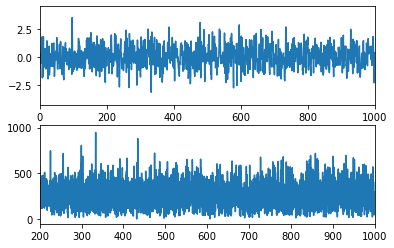

In [36]:
mean = 0
std  = 1

white_noise = np.random.normal(mean, std, size=n)

h_white = np.fft.fft(white_noise)
h_white = np.abs(h_white)

plt.subplot(211)
plt.plot(white_noise)
plt.xlim( 0, 1000)

plt.subplot(212)
plt.plot(freq[:int(n/2)], h_white[:int(n/2)])
plt.xlim(200, 1000)

## 弱定常課程

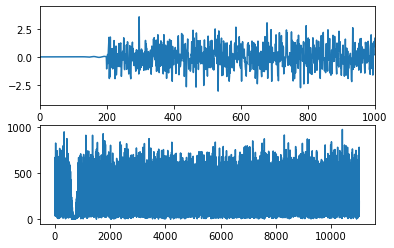

In [40]:
# input white noise
y = signal.lfilter(wfir, 1, white_noise)

# FFT
Y = np.fft.fft(y)
Y = np.abs(Y)


plt.subplot(211)
plt.plot(y)
plt.xlim( 0, 1000)

plt.subplot(212)
plt.plot(freq[:int(n/2)], Y[:int(n/2)])


## スペクトル推定 $S(\omega n)$

Text(0, 0.5, '$H(\\omega)$')

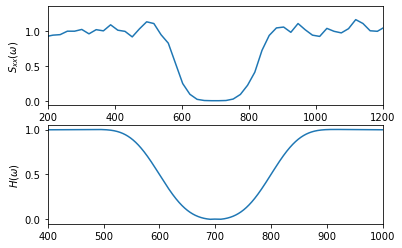

In [73]:
f, Sxx = signal.welch(y, fs, window='triang', nperseg=1024, scaling='spectrum')

plt.subplot(211)
plt.plot(f, Sxx * 400)
plt.xlim(200, 1200)
plt.ylabel('$S_{xx}(\omega)$')

plt.subplot(212)
plt.plot(freq[:int(n/2)], H[:int(n/2)])
plt.xlim(400, 1000)
plt.ylabel('$H(\omega)$')
